# Python Data Science Workshop by GreatLearning
Basics of Data science in Python using NumPy and Pandas

## Intro to NumPy Arrays


In [1]:
import numpy as np

In [2]:
single_array = np.array([7,8,9])

In [4]:
print (single_array)

[7 8 9]


In [5]:
multi_dim_array = np.array([(1,2,3),(7,8,9)])

In [8]:
print('Multi dimensional array: \n', multi_dim_array)

Multi dimensional array: 
 [[1 2 3]
 [7 8 9]]


In [9]:
print(multi_dim_array.shape)

(2, 3)


In [10]:
import pandas as pd

# Real life ML example (Credit Card fraud detection)

## Import data from CSV


In [11]:
!wget https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv

--2020-07-20 12:15:45--  https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.1, 2620:100:6018:1::a27d:301
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.1|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/18vhxydhoe3g84n/creditcard%202.csv [following]
--2020-07-20 12:15:46--  https://www.dropbox.com/s/raw/18vhxydhoe3g84n/creditcard%202.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccf5adcb7475cffe8da9bd0762c.dl.dropboxusercontent.com/cd/0/inline/A76YXEza_3rA6Zi0MzZZvGAM3P8SFKGmlGufIASgHTf28JkHEDp274OZnHPMWA02TK_QwCUQTVTmBYgWgDX8KcTuthr6ULvAv3niGYyxdgYa-IGyNpFeT8FASeYhTnp0IUo/file# [following]
--2020-07-20 12:15:46--  https://uccf5adcb7475cffe8da9bd0762c.dl.dropboxusercontent.com/cd/0/inline/A76YXEza_3rA6Zi0MzZZvGAM3P8SFKGmlGufIASgHTf28JkHEDp274OZnHPMWA02TK_QwCUQTVTmBYgWgDX8KcTuthr6ULvA

In [12]:
import pandas as pd
data_df = pd.read_csv('/content/creditcard 2.csv')

## Overview of the data structure

In [53]:
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Basic analysis


In [14]:
data_df.shape

(284807, 31)

### Statistics

In [15]:
data_df[['Amount', 'Time', 'Class']].describe()

,Amount,Time,Class
count,284807.000000,284807.000000,284807.000000
mean,88.349619,94813.859575,0.001727
std,250.120109,47488.145955,0.041527
min,0.000000,0.000000,0.000000
25%,5.600000,54201.500000,0.000000
50%,22.000000,84692.000000,0.000000
75%,77.165000,139320.500000,0.000000
max,25691.160000,172792.000000,1.000000


In [16]:
data_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [17]:
data_df.isna().any()

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

In [19]:
data_df['Class'].tail(10)

284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, dtype: int64

### Visualization

#### Global overview

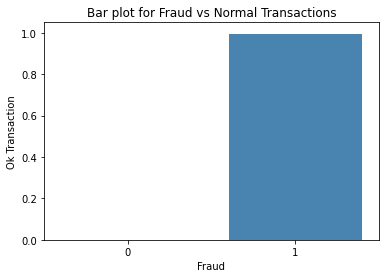

In [29]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LinearRegression, LogisticRegression
plt.title('Bar plot for Fraud vs Normal Transactions')
sns.barplot(x = 'Fraud', y = 'Ok Transaction', data = plot_data, palette='Blues', edgeColor='w')



#### Distribution Time vs Amount

Text(0.5, 1.0, 'Time vs Amount')

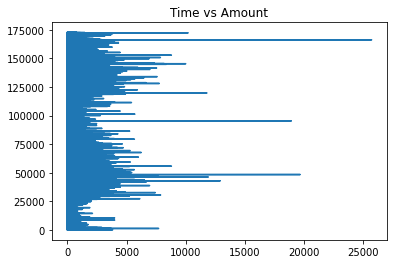

In [30]:
x=data_df['Amount']
y=data_df['Time']
plt.plot(x,y)
plt.title('Time vs Amount')

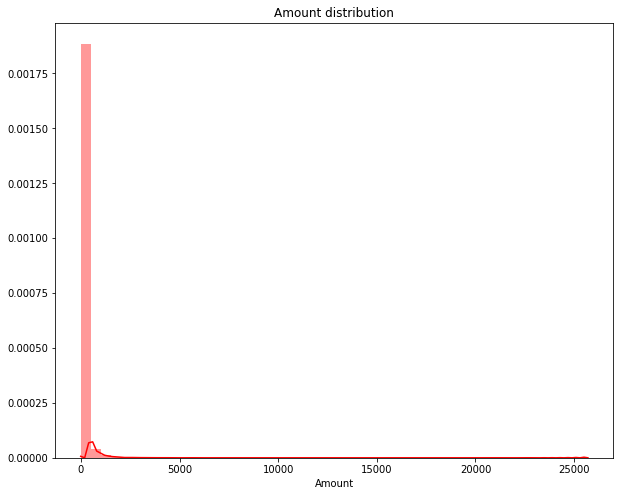

In [32]:
plt.figure(figsize=(10,8),)
plt.title('Amount distribution')
sns.distplot(data_df['Amount'], color='red')

#### Scatterplot Amount vs Time
Visualization of the outliers. For example too big amount in an unusual time, or any difference from the average.

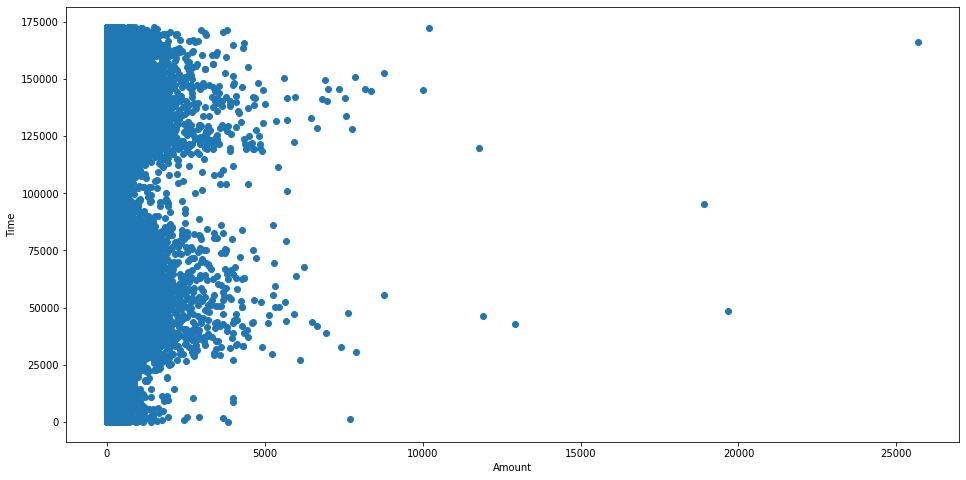

In [36]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(data_df['Amount'], data_df['Time'])
ax.set_xlabel('Amount')
ax.set_ylabel('Time')
plt.show()

#### Correlation heatmap

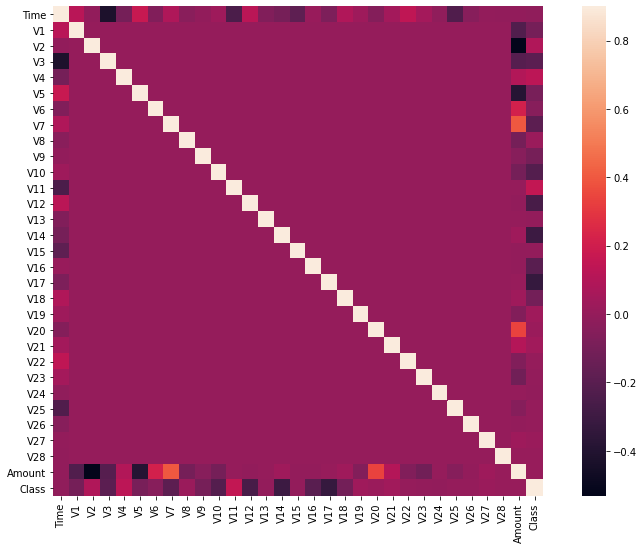

In [38]:
correlation_metrics = data_df.corr()
fig = plt.figure(figsize=(14,9))
sns.heatmap(correlation_metrics, vmax=.9 , square=True)
plt.show()

## Classification


In [20]:
nfcount=0
notFroud=data_df['Class']
for i in range(len(notFroud)):
  if notFroud[i]==0:
    nfcount = nfcount +1

nfcount
per_nf = (nfcount/len(notFroud))*100
print (per_nf)

99.82725143693798


In [21]:
fcount = 0
Fraud = data_df['Class']
for i in range(len(Fraud)):
  if Fraud[i] == 1:
    fcount = fcount + 1

fcount
per_f = (fcount/len(Fraud))*100


In [22]:
per_f

0.1727485630620034

In [23]:
plot_data = pd.DataFrame()
plot_data['Fraud'] = Fraud
plot_data['Ok Transaction'] = notFroud
plot_data

,Fraud,Ok Transaction
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
284802,0,0
284803,0,0
284804,0,0
284805,0,0


## Data cleaning
... and splitting the dataset to training and testing parts.

In [39]:
x=data_df.drop(['Class'], axis =1 )
y=data_df['Class']
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size=0.2, random_state = 42)

## Regression
Training and result accuracy...

In [40]:
linearreg = LinearRegression()
linearreg.fit(xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_pred = linearreg.predict(xtest)

#### Linear regressiopn accuracy

In [42]:
accuracy = linearreg.score(xtrain, ytrain)
print('Accuracy score of LinReg: ', accuracy)

Accuracy score of LinReg:  0.5228417791205772


In [43]:
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Logaritmic regression accuracy
Better in this situation becausse the data is not continous.

In [45]:
logaccuracy = logreg.score(xtrain, ytrain)
logaccuracy

0.9989554302266892

## Confusion matrix (trained model fitting results)
_Wikipedia: In the field of machine learning and specifically the problem of statistical classification, a confusion matrix, also known as an **error matrix**,[8] is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one (in unsupervised learning it is usually called a matching matrix). Each row of the matrix represents the instances in a predicted class while each column represents the instances in an actual class (or vice versa).[9] The name stems from the fact that it makes it easy to see if the system is confusing two classes (i.e. commonly mislabeling one as another)._

In [52]:
from sklearn import metrics
y_pred = logreg.predict(xtest)
cm = metrics.confusion_matrix(ytest, y_pred)
print('Shape of the dataframe: ', data_df.shape)
print ('Confusion Matrix: \n', cm)

Shape of the dataframe:  (284807, 31)
Confusion Matrix: 
 [[56829    35]
 [   45    53]]
